In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from Strawry.env import Env 
env = Env()

ERROR:root:Line magic function `%autoreload` not found.


In [2]:
env.set_target(temp=10,humi=80,co2=350,light=0,watp=0)

440

Score over time: 81.14


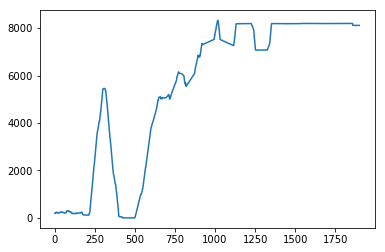

In [34]:
Q= np.zeros((env.n_state, env.n_action))
y = 0.95
lr = 0.01

num_episodes = 2000


rList = []
alpha=np.log(0.1)/num_episodes
for i in range(num_episodes):
    lr= np.exp(alpha*i) #adaptive learning start with exploration
    s = env.reset()
    rAll = 0
    done=False
    #The Q-Table learning algorithm
    while done==False:
        #randomly exploration of precisely choose best action
        if np.random.rand() < lr*0.01:
            a = np.random.randint(env.n_action)
        else:
            a = np.argmax(Q[s,:] )
        #get new state and reward from environment
        s1,reward,done,_ = env.step(a)
        #giving panalty to Hole and no move
        if done:
            r = 1 if reward > 0.0 else -1
        else:
            r = -0.1
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] +  lr*(r + y*np.max(Q[s1,:]) - Q[s,a])

        rAll += reward
        s = s1
        if done == True:
            break
    rList.append(rAll)
print ("Score over time: " +  str(sum(rList[-100:])/100.0))
plt.plot(np.convolve(np.ones(100),rList,"valid"))

In [4]:
print (s
       
      )

60
